	 Mult cong  	 MacLaren-Marsaglia
1 	 0.477876225021   0.646218533162
15 	 0.113855318632   0.341329486575
100 	 0.540152164642   0.255160468165
900 	 0.498978825752   0.486700112466
1000 	 0.257560538594   0.754448951688
Test moments mkm 	 True
Test moments mmm 	 True
Cov test faild j :  11
Cov test faild j :  20
Cov test faild j :  26
[0.082683258801980131, 0.0011091428208300225, 0.00050824315941216947, 0.0027849921921903609, 0.00012316891353569837, 0.002658474799604682, 0.0025235991557487902, 0.0010968874163946873, 0.0026315687651262687, 0.00058942992825578022, 0.00078391012930489889, 0.0072175155345626241, 0.00057778015766973834, 0.0035057847161164002, 0.0014869768002717665, 0.0018983180459474225, 0.00045619816675757097, 0.00041131535113114737, 0.00046881858909225693, 0.0022631613130355555, 0.0093020691155828727, 0.00093147619882993915, 0.00094201706554747355, 0.0023766388902266011, 0.0013636716056311671, 0.0040980727182847732, 0.0061574804466806854, 0.0047137426219639456, 0.001738

C:\Interpreters\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


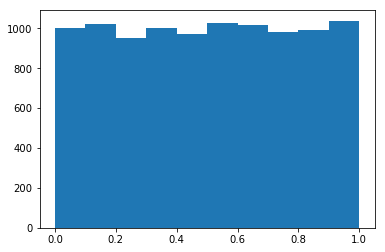

In [410]:
import numpy as np
from functools import reduce
from scipy.special import erf
import pandas as pd
import matplotlib.pyplot as plt
m = 2**31
def generate_mkm(n,a,b):
    b = np.maximum(b, m - b);
    values = [a]
    for i in range(1,n+1):
        values.append( ((values[i-1]*b)%m)) 
    for i in range(0,n+1): 
        values[i]/=m ###fix###
    return values
def generate_mmm(n,k,l1,l2):
    b,c = l1[1:],l2[1:]
    values= []
    v=b[:]
    for i in range(0,n):
        ind = int(np.floor(c[i]*k))
        values.append(v[ind])
        v[ind]=b[i+k]
    return values

def fi(x):
    return 1/2 * (1 + erf(x / 2**(1/2)))

def test_moments(l,eps):
    n,m,s=len(l)-1,0,0
    m=sum(l[1:])/n
    s=reduce( lambda a,x: a+(x-m)**2 ,l,0)/(n-1)
    x_1,x_2=np.abs(m-0.5),np.abs(s-1/12)
    с_1= (12*n)**(1/2)
    с_2 = (n-1/n)*( (0.0056/n + 0.0028/n**2 - 0.0083/n**3)**1/2)
    p1 = 2 * (1 - fi(с_1 * x_1))
    p2 = 2 * (1 - fi( с_2 * x_2))
    return (p1>eps) and (p2>eps)
                  
l1,l2=generate_mkm(1000+224,14726181, 187541225),generate_mkm(10000,392177641, 327684489)
l3 = generate_mmm(1000,224,l1,l2)

indexes = [1, 15, 100, 900, 1000]
print('\t','Mult cong ','\t','MacLaren-Marsaglia')
for i in indexes:
    print(i,'\t',l1[i],' ',l3[i-1])
print('Test moments mkm','\t', test_moments(l1,0.05))
print('Test moments mmm','\t',test_moments(l3,0.05))

def test_cov(l,t,eps):
    r_ = []
    r = []
    p = []
    n=len(l)-1
    c = [ 1 for i in range(0,len(l)+1)]
    r = [ 0 for i in range(0,len(l)+1)]
    c[0]=2**(1/2)
    r[0]=1/12
    # FI(0.05)=1,96 табл 1.4 стр 27
    m=sum(l[1:])/n
    for j in range(0,t):
        r_.append( abs( 1/(n-j-1)*sum([ l[i]*l[i+j] for i in range(2,n-j+1)] ) - (n/(n-1))*(m**2) ) ) 
        dif = np.abs(r_[j]-r[j])
        p.append( {j:dif<(c[j]*1.96/ (12*(n-1)**(1/2)))})
        if(p[j][j] == False):
            print('Cov test faild j : ' ,j)
    print(r_)
    print(p)
test_cov(l3,30,0.05)

plt.hist(l2, bins=10)
plt.show()